# Import libraries

In [44]:
import os
import numpy as np
import pandas as pd
from math import sqrt
from matplotlib import pyplot
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read and Filter data

Size before filtering = (21613, 21) 
Size after filtering = (21613, 13) 


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


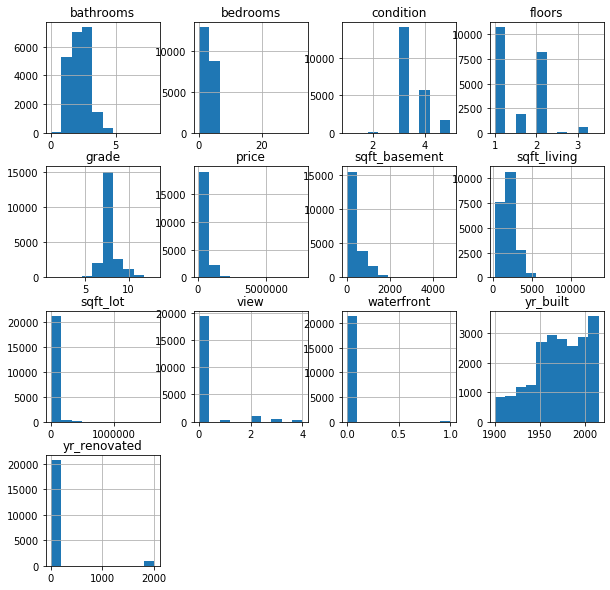

In [45]:
dataOLD = pd.read_csv(r'house_data_complete.csv')
print("Size before filtering = {} ".format(dataOLD.shape))


data = dataOLD.drop(["id","date","sqft_above","zipcode","lat","long","sqft_living15","sqft_lot15"] , axis = 1)
print("Size after filtering = {} ".format(data.shape))

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax=ax)
pyplot.show()

data = data.drop(data[data.bedrooms > 20].index)
data = data.drop(data[data.sqft_living > 5000].index)
data = data.drop(data[data.bathrooms > 7].index)
data = data.drop(data[data.sqft_lot > 100000].index) #15
#data = data.drop(data[data.price > 2000000].index)

#  CSV to array

In [46]:
Data_array = data.to_numpy()

# Plot function

In [47]:
def plotData(x, y, ylabel, xlabel):

    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel(ylabel)
    pyplot.xlabel(xlabel)

# Plotting each feature with the price

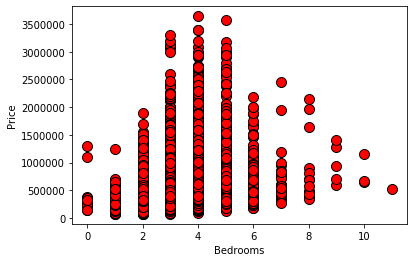

In [48]:
Prices = Data_array[:,0]
Bedrooms = Data_array[:,1]
plotData(Bedrooms,Prices,'Price','Bedrooms')

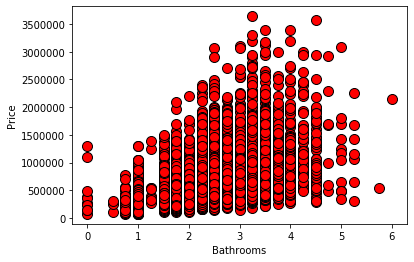

In [49]:
Prices = Data_array[:,0]
Bathrooms = Data_array[:,2]
plotData(Bathrooms,Prices,'Price','Bathrooms')

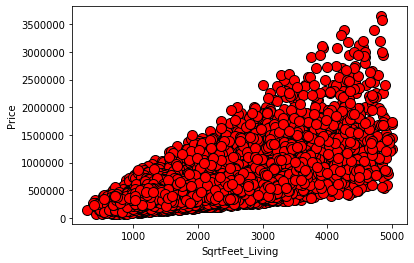

In [50]:
Prices = Data_array[:,0]
Feets = Data_array[:,3]
plotData(Feets,Prices,'Price','SqrtFeet_Living')

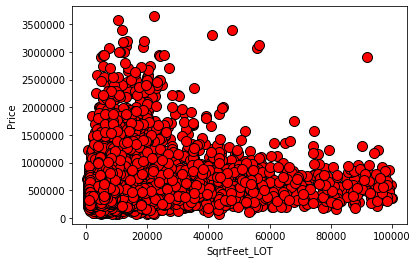

In [51]:
Prices = Data_array[:,0]
SqrtFeet_LOT = Data_array[:,4]
plotData(SqrtFeet_LOT,Prices,'Price','SqrtFeet_LOT')

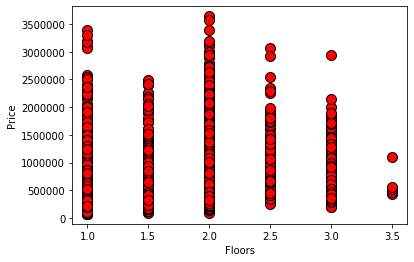

In [52]:
Prices = Data_array[:,0]
Floors = Data_array[:,5]
plotData(Floors,Prices,'Price','Floors')

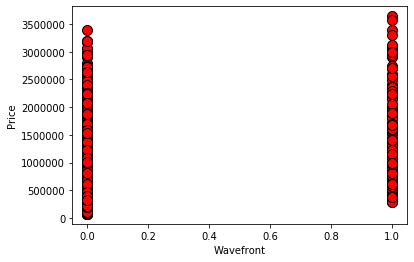

In [53]:
Prices = Data_array[:,0]
Wavefront = Data_array[:,6]
plotData(Wavefront,Prices,'Price','Wavefront')

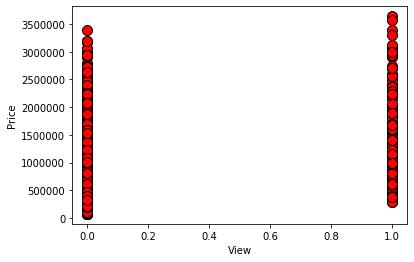

In [54]:
Prices = Data_array[:,0]
View = Data_array[:,7]
plotData(Wavefront,Prices,'Price','View')

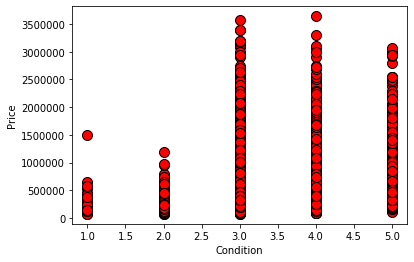

In [55]:
Prices = Data_array[:,0]
Condition = Data_array[:,8]
plotData(Condition,Prices,'Price','Condition')


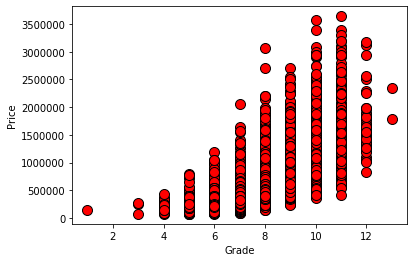

In [56]:
Prices = Data_array[:,0]
Grade = Data_array[:,9]
plotData(Grade,Prices,'Price','Grade')

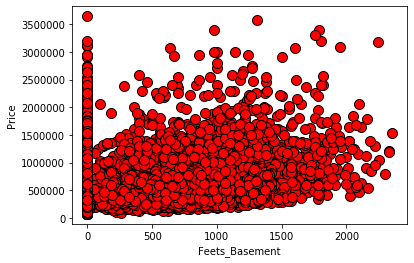

In [57]:
Prices = Data_array[:,0]
Feets_Basement = Data_array[:,10]
plotData(Feets_Basement,Prices,'Price','Feets_Basement')

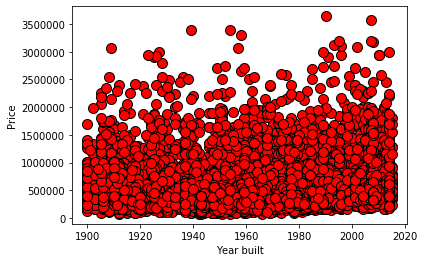

In [58]:
Prices = Data_array[:,0]
Year = Data_array[:,11]
plotData(Year,Prices,'Price','Year built')

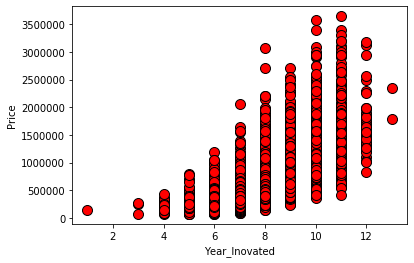

In [59]:
Prices = Data_array[:,0]
Year_Inov = Data_array[:,12]
plotData(Grade,Prices,'Price','Year_Inovated')

# Plotting all the data with the price

Text(0.5, 0, 'All data')

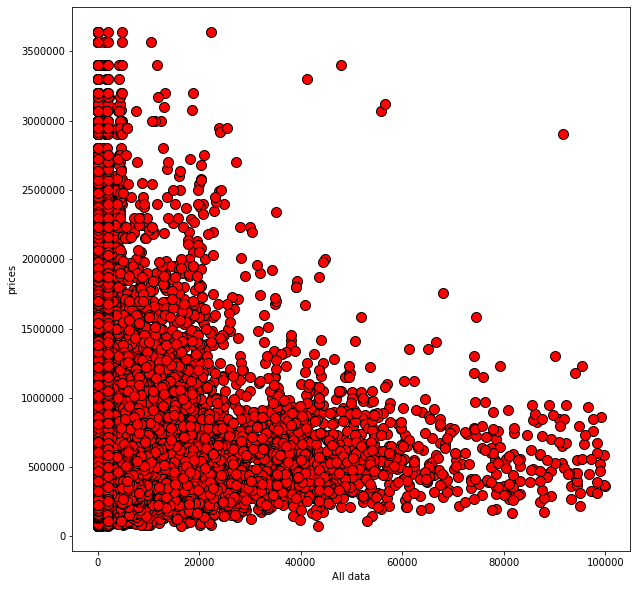

In [60]:
fig2 = pyplot.figure(figsize = (10,10))
pyplot.plot(Data_array[:,1:], Data_array[:,0], 'ro', ms=10, mec='k')
pyplot.ylabel("prices")
pyplot.xlabel("All data")

# Separating Features (I/P) and the prices (O/P)

In [61]:
X = Data_array[:,1:]
Y = Data_array[:,0]
print("Size of features array = {} ".format(X.shape))
print("Size of output array = {} ".format(Y.shape))


Size of features array = (20964, 12) 
Size of output array = (20964,) 


# Dividing data into Trainning, validation and test  

In [62]:
# Dividing into 70% Trainning set and 30% the rest.
X_train, X_check, Y_train, Y_check = train_test_split(X, Y, test_size = 0.3, shuffle = True) 

# Dividing the remaining 30% into 10% Testing set and 20% validation set.
X_validation , X_test, Y_validation, Y_test = train_test_split(X_check, Y_check, test_size = 0.3, shuffle = True)

print("70% for training set :")
print("----------------------")
print("Size of X_train set = {} ".format(X_train.shape))
print("Size of Y_train set = {} ".format(Y_train.shape))
print("\n")
print("20% for validation set :")
print("----------------------")
print("Size of X_validation set = {} ".format(X_validation.shape))
print("Size of Y_validation set = {} ".format(Y_validation.shape))
print("\n")
print("10% for test set :")
print("----------------------")
print("Size of X_Test set = {} ".format(X_test.shape))
print("Size of Y_Test set = {} ".format(Y_test.shape))



70% for training set :
----------------------
Size of X_train set = (14674, 12) 
Size of Y_train set = (14674,) 


20% for validation set :
----------------------
Size of X_validation set = (4403, 12) 
Size of Y_validation set = (4403,) 


10% for test set :
----------------------
Size of X_Test set = (1887, 12) 
Size of Y_Test set = (1887,) 


# Normalization function

In [63]:
def featureNormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# Normalizing Train, validation and test sets

In [64]:
X_train_norm,mu,sigma = featureNormalize(X_train)

X_test_norm = (X_test - mu)/sigma
X_validation_norm = (X_validation - mu)/sigma


# Adding intercept term to our sets ( representing X(0) )

In [65]:
Y_train_size = Y_train.size
Y_validation_size = Y_validation.size
Y_test_size = Y_test.size

#print(Y_train_size)
#print(Y_validation_size)
#print(Y_test_size)

X_train_norm = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm], axis=1 )
X_test_norm = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm], axis=1 )
X_validation_norm = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm], axis=1 )

print("Size of Y_train = {}".format(Y_train.shape))
print("Size of X_train_norm = {}".format(X_train_norm.shape))

print(X_train_norm.shape)
#print(X_validation_norm.shape)
#print(X_test_norm.shape)


Size of Y_train = (14674,)
Size of X_train_norm = (14674, 13)
(14674, 13)


# 1st Hypothesis :
# -----------------------

-- Linear hypothesis

# Cost function 

In [66]:
def computeCostMulti(X, y, theta):
    
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    """
    m = y.shape[0]
    J = 0

    J= (1/(2*m)) * np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y)

    return J


# Gradient decent function

In [67]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.

    """
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    X = np.array(X)

    for i in range(num_iters):
        
        hypothesis= np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(hypothesis-y,X)))

        J_history.append(computeCostMulti(X, y, theta))
        
    return theta, J_history

# Get the gradient decent values for Hyp1

Theta calculated from gradient descent function: 
 [524325.73258825 -27156.42445675  31097.93986014 115011.16281372
 -15868.73705338  14490.19971694  40940.63721212  37315.40164722
  13128.17707636 146143.6435407    3298.15891829 -98197.65654906
   4631.15819762]


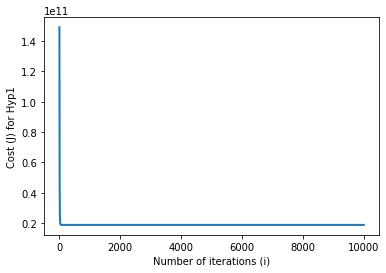

In [68]:
# (>) --> (Faster)
#α_hyp1 = 0.0001
α_hyp1 = 0.1

#Random
iterations_hyp1 = 10000

# For our 13 feature
theta_hyp1 = np.zeros(13)


#Gradient decent function call
theta_hyp1, J_history_hyp1 = gradientDescentMulti(X_train_norm, Y_train, theta_hyp1, α_hyp1, iterations_hyp1)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history_hyp1)), J_history_hyp1, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp1')

# Display the gradient descent's result
print("Theta calculated from gradient descent function: \n {:s}".format(str(theta_hyp1)))

# Training data correlation for 1st hypthesis

In [69]:
Y_train_prediction_hyp1 = np.dot(X_train_norm, theta_hyp1)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_train_hyp1, blabla = pearsonr(Y_train, Y_train_prediction_hyp1)

print("Pearsons correlation of training data for hyp1 : {}".format(correlation_train_hyp1))

Pearsons correlation of training data for hyp1 : 0.7972897938708793


# Validation data correlation for 1st hypthesis

In [70]:
Y_validation_prediction_hyp1 = np.dot(X_validation_norm, theta_hyp1)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_validation_hyp1, blabla = pearsonr(Y_validation, Y_validation_prediction_hyp1)

print("Pearsons correlation of validation data for hyp1 : {}".format(correlation_validation_hyp1))

Pearsons correlation of validation data for hyp1 : 0.7979616582396614


# Testing data correlation for 1st hypthesis

In [71]:
Y_test_prediction_hyp1 = np.dot(X_test_norm, theta_hyp1)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_test_hyp1, blabla = pearsonr(Y_test, Y_test_prediction_hyp1)

print("Pearsons correlation of testing data for hyp1 : {}".format(correlation_test_hyp1))

Pearsons correlation of testing data for hyp1 : 0.7804125772329185


# 2nd Hypothesis :
# -------------------------

Hyp2 = [X(0)*X(4)*X(7)*X(8)]*θ(0) + [X(11)*X(5)*X(6)]*θ(1) + [X(1)*X(2)*X(9)*X(10)]*θ(2) + [X(3)]*θ(3)

# 2nd hypothesis function

In [72]:
def hypFn_2(X):
    X_new = np.zeros((X.shape[0],4))
    
##    X_new[:,0] = X[:,0]
##    X_new[:,1] = X[:,1] * X[:,2] * X[:,3]
##    X_new[:,2] = X[:,4] * X[:,5] * X[:,6]
##    X_new[:,3] = X[:,7] * X[:,8] * X[:,9]
##    X_new[:,4] = X[:,10] * X[:,11]
    
##    X_new = np.zeros((X.shape[0],5))
##    X_new[:,0] = (X[:,0] * X[:,1] * X[:,2] * X[:,3] * X[:,4] * X[:,5] * X[:,6] *  X[:,7] * X[:,8] * X[:,9] * X[:,10] * X[:,11])-5
    
    X_new[:,0] = X[:,0] * X[:,4] * X[:,7] * X[:,8]
    X_new[:,1] = X[:,11] * X[:,5] * X[:,6]
    X_new[:,2] = X[:,1] * X[:,2] * X[:,9] * X[:,10]
    X_new[:,3] = X[:,3]

##    np.seterr(divide='ignore', invalid='ignore')
##    X_new[:,0] = np.square(np.divide(1,X[:,0] * X[:,4] * X[:,7] * X[:,8]))
##    X_new[:,1] = np.square(np.divide(1,X[:,11] * X[:,5] * X[:,6]))
##    X_new[:,2] = np.square(np.divide(1,X[:,1] * X[:,2] * X[:,9] * X[:,10]))
##    X_new[:,3] = np.square(np.divide(1,X[:,3]))

    return X_new

# Transforming features by the second hypothesis 

In [73]:
# Transdorming of training set 
X_train_norm_hyp2 = hypFn_2(X_train)

#Transforming of validation set 
X_validation_hyp2 = hypFn_2(X_validation)

#Transforming of testing set 
X_test_hyp2 = hypFn_2(X_test)

print(X_test_hyp2.shape)

(1887, 4)


# Normalzing the sets and adding intercept term

In [74]:
#Normalization.
X_train_norm_hyp2 ,mu_hyp2,sigma_hyp2 = featureNormalize(X_train_norm_hyp2)
X_test_norm_hyp2 = (X_test_hyp2 - mu_hyp2)/sigma_hyp2
X_validation_norm_hyp2 = (X_validation_hyp2 - mu_hyp2)/sigma_hyp2
print(X_train_norm_hyp2.shape)

#Adding the intercept coloumn.
X_train_norm_hyp2 = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm_hyp2], axis=1 )
X_validation_norm_hyp2 = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm_hyp2], axis=1 )
X_test_norm_hyp2 = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm_hyp2], axis=1 )
print(X_train_norm_hyp2.shape)

print("Size of Y_train = {}".format(Y_train.shape))
print("Size of X_train_norm_hyp2 = {}".format(X_train_norm_hyp2.shape))

(14674, 4)
(14674, 5)
Size of Y_train = (14674,)
Size of X_train_norm_hyp2 = (14674, 5)


# Get the gradient decent values for Hyp2

Theta calculated from gradient descent function: 
 [524325.73258825 148528.9127207   29932.12709169 103266.57580489
  19576.05785033]


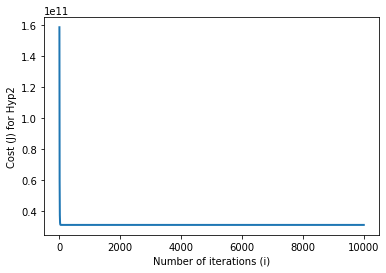

In [75]:
# (>) --> (Faster)
#α_hyp2 = 0.0001
α_hyp2 = 0.1

#Random
iterations_hyp2 = 10000

# For our 6 feature
theta_hyp2 = np.zeros(5)

#Gradient decent function call
theta_hyp2, J_history_hyp2 = gradientDescentMulti(X_train_norm_hyp2, Y_train, theta_hyp2, α_hyp2, iterations_hyp2)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history_hyp2)), J_history_hyp2, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp2')

# Display the gradient descent's result
print("Theta calculated from gradient descent function: \n {:s}".format(str(theta_hyp2)))

# Training data correlation for 2nd hypthesis

In [76]:
Y_train_prediction_hyp2 = np.dot(X_train_norm_hyp2, theta_hyp2)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_train_hyp2, blabla = pearsonr(Y_train, Y_train_prediction_hyp2)

print("Pearsons correlation of training data for hyp2 : {}".format(correlation_train_hyp2))

Pearsons correlation of training data for hyp2 : 0.632208770850277


# Validation data correlation for 2nd hypthesis

In [77]:
Y_validation_prediction_hyp2 = np.dot(X_validation_norm_hyp2, theta_hyp2)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_validation_hyp2, blabla = pearsonr(Y_validation, Y_validation_prediction_hyp2)

print("Pearsons correlation of validation data for hyp2 : {}".format(correlation_validation_hyp2))

Pearsons correlation of validation data for hyp2 : 0.6217814638563868


# Testing data correlation for 2nd hypthesis

In [78]:
Y_test_prediction_hyp2 = np.dot(X_test_norm_hyp2, theta_hyp2)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_test_hyp2, blabla = pearsonr(Y_test, Y_test_prediction_hyp2)

print("Pearsons correlation of testing data for hyp2 : {}".format(correlation_test_hyp2))

Pearsons correlation of testing data for hyp2 : 0.5937795326111475


# 3rd Hypothesis :
# -------------------------

Hyp3 = [X(0)*X(1)]*θ(0) + [X(3)*X(2]]*θ(1) + [X(4)*X(5)]*θ(2) + [X(6)*X(7)]*θ(3) + [X(8)*X(9)]*θ(4) + [X(10)*X(11)]*θ(5)

# 3rd hypothesis function

In [79]:
print(X.shape)
def hypFn_3(X):
    
#    X_new = np.zeros((X.shape[0],4))
    
#    X_new[:,0] = np.power( X[:,0] * X[:,1] * X[:,2]  ,3 )
#    X_new[:,1] = np.power( X[:,3] * X[:,4] * X[:,5]  ,2 )
#    X_new[:,2] = np.power( X[:,6] * X[:,7] * X[:,8]  ,1 )
#    X_new[:,3] = X[:,9] * X[:,10] * X[:,11]

    X_new = np.zeros((X.shape[0],6))
    
    X_new[:,0] = X[:,0] * X[:,1] 
    X_new[:,1] = X[:,2] * X[:,3] 
    X_new[:,2] = X[:,4] * X[:,5]
    X_new[:,3] = X[:,6] * X[:,7]
    X_new[:,4] = X[:,8] * X[:,9]
    X_new[:,5] = X[:,10] * X[:,11]
    
    return X_new

(20964, 12)


# Transforming features by the third hypothesis 

In [80]:
# Transdorming of training set 
X_train_norm_hyp3 = hypFn_3(X_train)

#Transforming of validation set 
X_validation_hyp3 = hypFn_3(X_validation)

#Transforming of testing set 
X_test_hyp3 = hypFn_3(X_test)

print(X_train_norm_hyp3.shape)

(14674, 6)


# Normalzing the sets and adding intercept term

In [81]:
#Normalization.
X_train_norm_hyp3 ,mu_hyp3,sigma_hyp3 = featureNormalize(X_train_norm_hyp3)
X_test_norm_hyp3 = (X_test_hyp3 - mu_hyp3)/sigma_hyp3
X_validation_norm_hyp3 = (X_validation_hyp3 - mu_hyp3)/sigma_hyp3
print(X_train_norm_hyp3.shape)

#Adding the intercept coloumn.
X_train_norm_hyp3 = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm_hyp3], axis=1 )
X_validation_norm_hyp3 = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm_hyp3], axis=1 )
X_test_norm_hyp3 = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm_hyp3], axis=1 )
print(X_train_norm_hyp3.shape)

print("Size of Y_train = {}".format(Y_train.shape))
print("Size of X_train_norm_hyp3 = {}".format(X_train_norm_hyp3.shape))

(14674, 6)
(14674, 7)
Size of Y_train = (14674,)
Size of X_train_norm_hyp3 = (14674, 7)


# Get the gradient decent values for Hyp3

Theta calculated from gradient descent function: 
 [524325.73258825 113252.27028873  45066.04254173  39052.25733645
  75953.70639527  39721.51081979  23022.20435515]


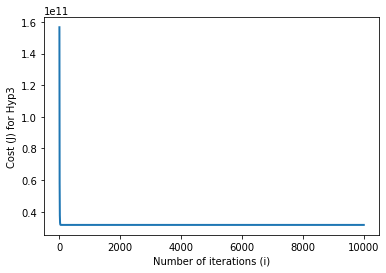

In [82]:
# (>) --> (Faster)
#α_hyp3 = 0.0001
α_hyp3 = 0.1

#Random
iterations_hyp3 = 10000

# For our 7 feature
theta_hyp3 = np.zeros(7)

#Gradient decent function call
theta_hyp3, J_history_hyp3 = gradientDescentMulti(X_train_norm_hyp3, Y_train, theta_hyp3, α_hyp3, iterations_hyp3)


# Plot the convergence graph
pyplot.plot(np.arange(len(J_history_hyp3)), J_history_hyp3, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp3')

# Display the gradient descent's result
print("Theta calculated from gradient descent function: \n {:s}".format(str(theta_hyp3)))

# Training data correlation for 3rd hypthesis

In [83]:
Y_train_prediction_hyp3 = np.dot(X_train_norm_hyp3, theta_hyp3)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_train_hyp3, blabla = pearsonr(Y_train, Y_train_prediction_hyp3)

print("Pearsons correlation of training data for hyp3 : {}".format(correlation_train_hyp3))

Pearsons correlation of training data for hyp3 : 0.6229006329725707


# Validation data correlation for 3rd hypthesis

In [84]:
Y_validation_prediction_hyp3 = np.dot(X_validation_norm_hyp3, theta_hyp3)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_validation_hyp3, blabla = pearsonr(Y_validation, Y_validation_prediction_hyp3)

print("Pearsons correlation of validation data for hyp3 : {}".format(correlation_validation_hyp3))

Pearsons correlation of validation data for hyp3 : 0.617460086757587


# Testing data correlation for 3rd hypthesis

In [85]:
Y_test_prediction_hyp3 = np.dot(X_test_norm_hyp3, theta_hyp3)

# A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.
correlation_test_hyp3, blabla = pearsonr(Y_test, Y_test_prediction_hyp3)

print("Pearsons correlation of testing data for hyp3 : {}".format(correlation_test_hyp3))

Pearsons correlation of testing data for hyp3 : 0.5774610556129289


## To conclude 3 hypotheses were generated and each of them gave its unique correlation with repect to Training, validation and test sets. 
## However, the 1st hypothesis proved to have to best correlation among the 3 generated hypotheses. 
## Following, the 2rd hypothesis came in the 2nd place while the 3rd hypothesis had the worst correlation among the 3 generated hypotheses.


# Folding the data using hypothesis #1

In [86]:
i = 1
α_Fold = 0.1
Iterations_Fold = 10000
theta_Fold = np.zeros(13)
kfold = KFold(5)

for train, test in kfold.split(X):
    
    #Assigning the folding technique
    X_train_Fold = X[train]
    Y_train_Fold = Y[train]
    Y_train_Fold_size = Y_train_Fold.size
    
    X_test_Fold = X[test]
    Y_test_Fold = Y[test]
    Y_test_Fold_size = Y_test_Fold.size
    
    #Normalizing the matricies
    X_train_Fold_norm, mu_Fold, sigma_Fold = featureNormalize(X_train_Fold)
    X_test_Fold_norm = (X_test_Fold - mu_Fold)/(sigma_Fold)
    
    #print("Size of Y_train = {}".format(Y_train_Fold_size))
    #print("Size of X_train_Fold_norm = {}".format(X_train_Fold_norm.shape))
    
    #Concatinating the intercept coloumn
    X_train_Fold_norm = np.concatenate([np.ones((Y_train_Fold_size,1)), X_train_Fold_norm], axis = 1 )
    X_test_Fold_norm =  np.concatenate([np.ones((Y_test_Fold_size,1)), X_test_Fold_norm],  axis = 1 )
    
    #print("Size of X_train_Fold_norm = {}".format(X_train_Fold_norm.shape))
    #print("Size of X_train_Fold_norm = {}".format(X_train_Fold_norm.shape))
    
    #Perform gradient decent for each fold
    theta_Fold, J_history_Fold = gradientDescentMulti(X_train_Fold_norm, Y_train_Fold, theta_Fold, α_Fold, Iterations_Fold)
    
    #Printing the tag for each fold
    print('Fold No. = ',i)
    
    #Training data correlation for Hypothesis's 1 Fold
    Y_train_prediction_hyp1_Fold = np.dot(X_train_Fold_norm, theta_Fold)
    correlation_train_hyp1_Fold, blabla = pearsonr(Y_train_Fold, Y_train_prediction_hyp1_Fold)
    print("Pearsons correlation of training data for hyp1 : {}".format(correlation_train_hyp1_Fold))
    
    #Testing data correlation for Hypothesis's 1 Fold
    Y_test_prediction_hyp1_Fold = np.dot(X_test_Fold_norm, theta_Fold)
    correlation_test_hyp1_Fold, blabla = pearsonr(Y_test_Fold, Y_test_prediction_hyp1_Fold)
    print("Pearsons correlation of testing data for hyp1  : {}\n".format(correlation_test_hyp1_Fold))
    
    #Incrementing the folds counter
    i = i + 1


Fold No. =  1
Pearsons correlation of training data for hyp1 : 0.7954281715362435
Pearsons correlation of testing data for hyp1  : 0.7984145028476923

Fold No. =  2
Pearsons correlation of training data for hyp1 : 0.7960145470518756
Pearsons correlation of testing data for hyp1  : 0.7958694590520164

Fold No. =  3
Pearsons correlation of training data for hyp1 : 0.7968005462310004
Pearsons correlation of testing data for hyp1  : 0.7924784410900563

Fold No. =  4
Pearsons correlation of training data for hyp1 : 0.7959748467374326
Pearsons correlation of testing data for hyp1  : 0.7957137089157105

Fold No. =  5
Pearsons correlation of training data for hyp1 : 0.7967535176726175
Pearsons correlation of testing data for hyp1  : 0.7932251116591249

